<a href="https://colab.research.google.com/github/FarzanaFasiha/6220-Final-Project/blob/main/6220_Final_Project_Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing and importing dependencies

In [73]:
#  Installing the Python libraries
!pip install pycaret==2.3.6
!pip install pandas
!pip install shap
!pip install --pre pycaret
!pip install pca
!pip install statsmodels

  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [74]:
# Importing the libraries
import pandas as pd
from pycaret.classification import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 2. Loading the data

In [75]:
# Loading the data
dfhd = pd.read_csv('https://raw.githubusercontent.com/FarzanaFasiha/6220-Final-Project/main/heart.csv')

In [76]:
# Checking the data
dfhd.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [77]:
# Exploring the types of data
dfhd.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

#3. Checking the data set


In [78]:
# Checking the data for people with heart disease and without heart disease
whd = dfhd[(dfhd['output'] == 0)].count()[1]

hd = dfhd[(dfhd['output'] ==1) ].count()[1]
print ("number of people without heart disease: "+ str(whd))
print ("number of people with possibility of heart disease: "+ str(hd))

number of people without heart disease: 138
number of people with possibility of heart disease: 165


#4. Plots

### Exploratory Data Analysis

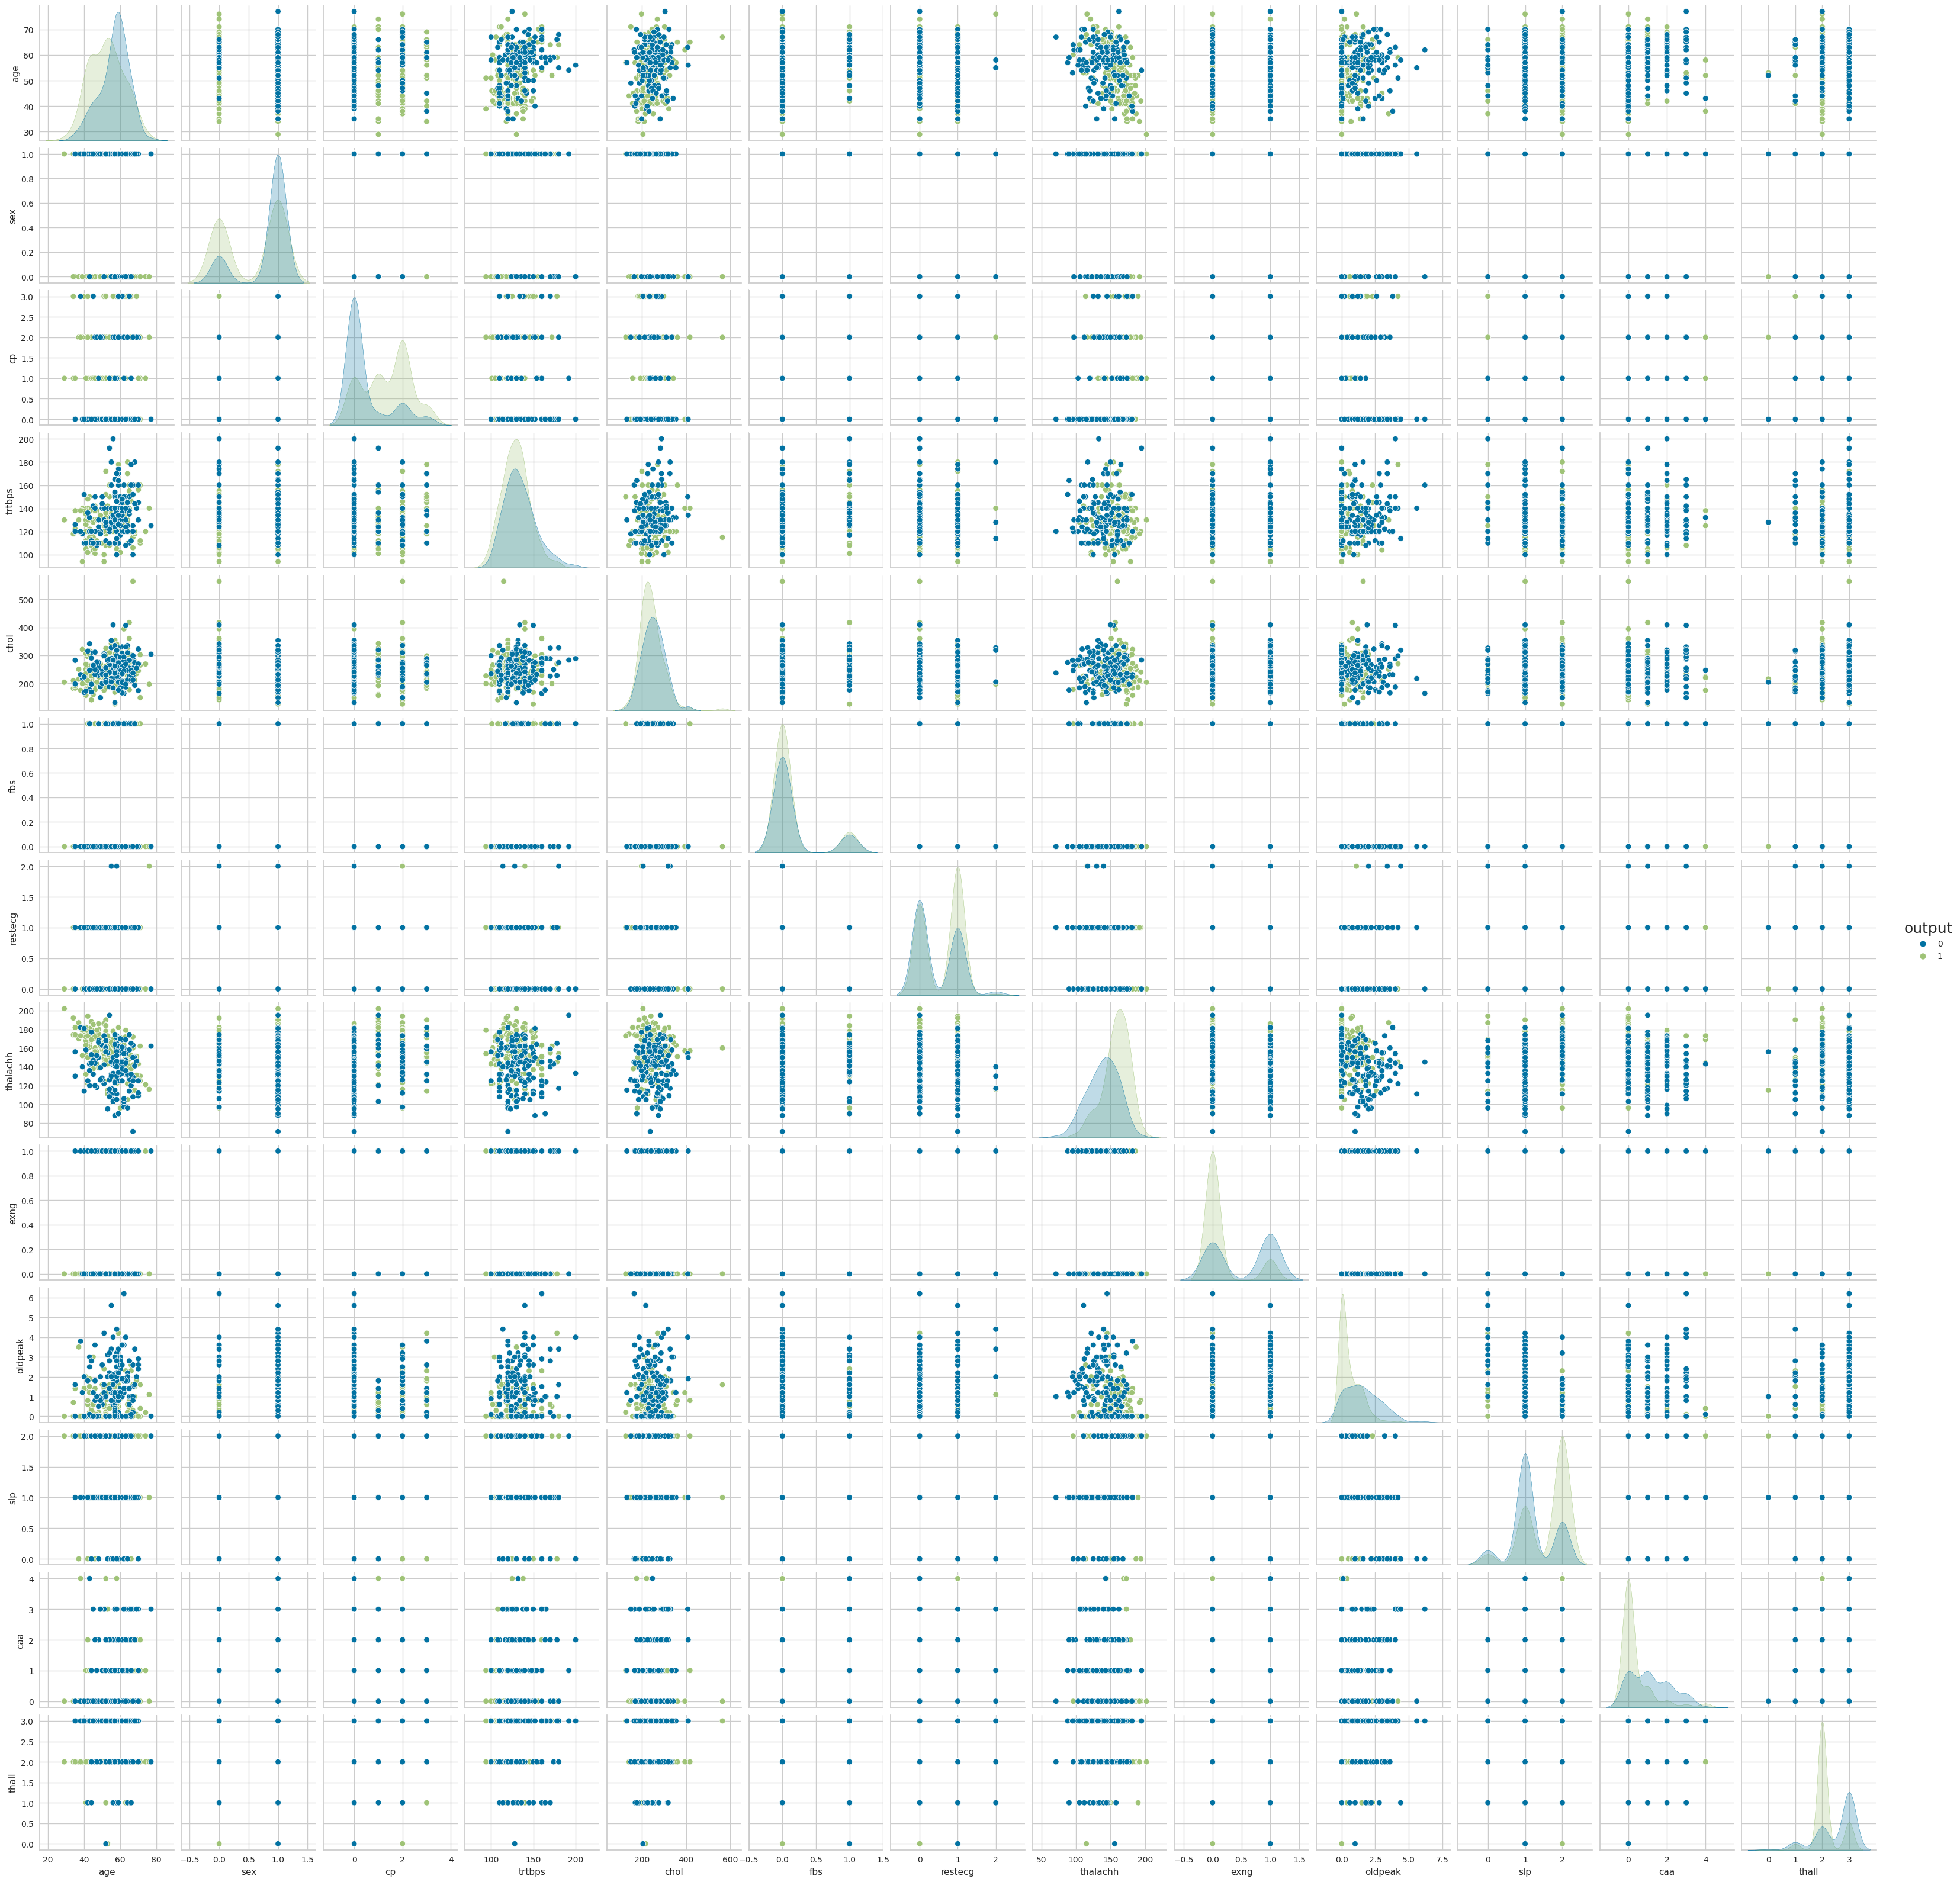

In [79]:
# Checking the pairplots for each column to other columns
sns.pairplot(dfhd,hue="output")
plt.show()

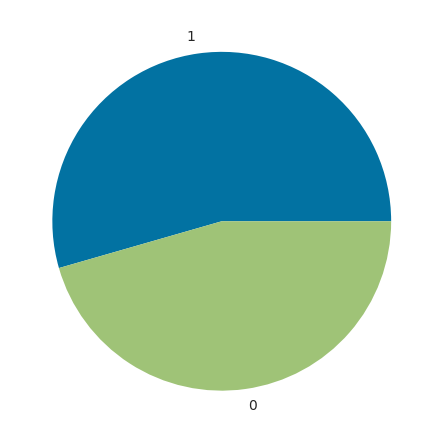

In [80]:
# Creating a variable for checking the output column

y=dfhd['output']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()


### Data Matrix

In [81]:
X = dfhd.drop(columns=['output'])
X.head(10)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   
5   57    1   0     140   192    0        1       148     0      0.4    1   
6   56    0   1     140   294    0        0       153     0      1.3    1   
7   44    1   1     120   263    0        1       173     0      0.0    2   
8   52    1   2     172   199    1        1       162     0      0.5    2   
9   57    1   2     150   168    0        1       174     0      1.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2  
5    0      1  
6    0      2  
7    0      3  
8    0      3  
9    0      2

In [82]:
X.describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa       303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall     303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0

Data Standardization

In [83]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

age       sex        cp    trtbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
5  0.290464  0.681005 -0.938515  0.478391 -1.048678 -0.417635  0.898962   
6  0.180175 -1.468418  0.032031  0.478391  0.922521 -0.417635 -1.005832   
7 -1.143291  0.681005  0.032031 -0.663867  0.323431 -0.417635  0.898962   
8 -0.260980  0.681005  1.002577  2.306004 -0.913400  2.394438  0.898962   
9  0.290464  0.681005  1.002577  1.049520 -1.512490 -0.417635  0.898962   

   thalachh      exng   oldpeak       slp       caa     thall  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922  
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922  
5 -0.072018 -0.696631 -0.551783 -0.649113 -0.714429 -2.148873  
6  0.146634 -0.696631  0.224643 -0.649113 -0.714429 -0.512922  
7  1.021244 -0.696631 -0.896862  0.976352 -0.714429  1.123029  
8  0.540209 -0.696631 -0.465514  0.976352 -0.714429  1.123029  
9  1.064975 -0.696631  0.483451  0.976352 -0.714429 -0.512922

### Correlation Matrix


<Axes: >

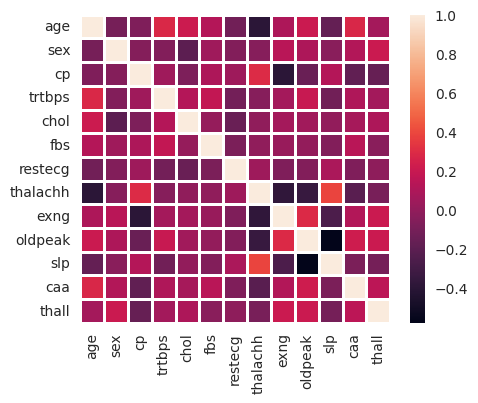

In [84]:
# Computing the correlation matrix in the standard and the normalized manner
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=dfhd.index, columns=dfhd.columns[0:13])
corr = dfNorm.corr()

# Plotting the heatmap for the correlation matrix
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

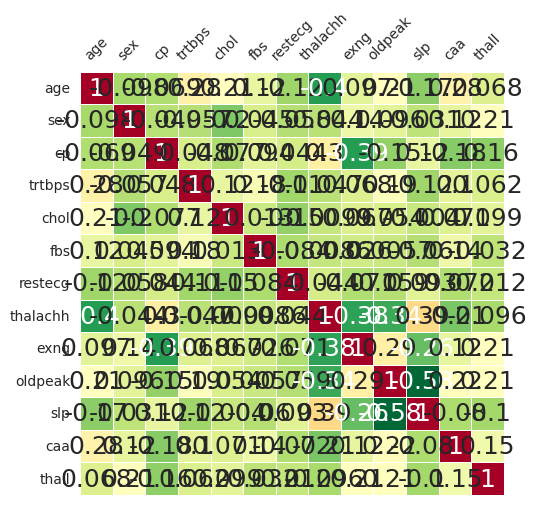

In [85]:
# The correlation matrix with values

ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Observation & Variables

In [86]:
observations = list(dfhd.index)
variables = list(dfhd.columns)

### Box and Whisker Plots

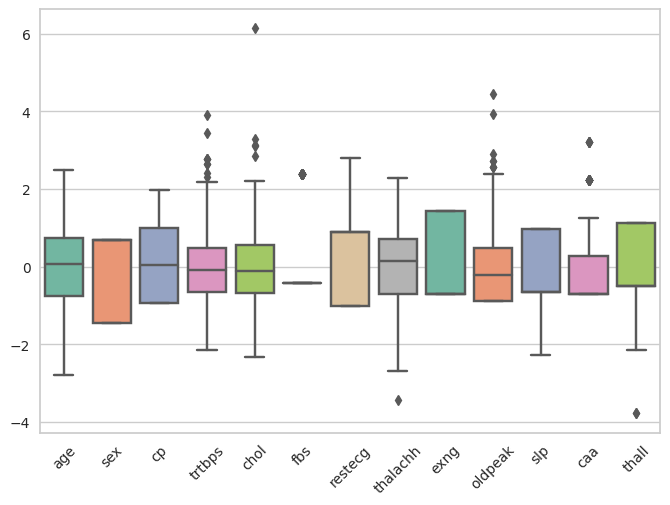

In [87]:
# Generating the box plots and displaying the outliers

ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

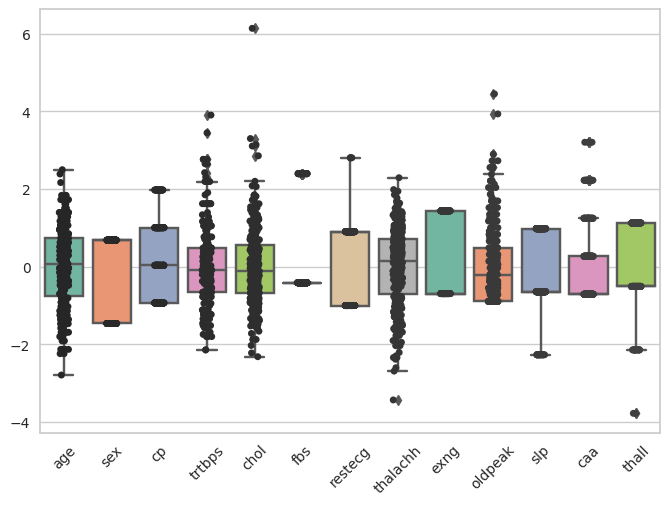

In [88]:
# Contructing boxplots with all the values for each column

ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### PCA

*   PCA is an exploratory multivariate technique for simplifying complex datasets (data reduction technique)
*   In a data set with many correlations, we need an ordination technique to look at overall structure
*  PCA is based on linear correlation
*  PCA transforms original variables into new uncorrelated variables
*  The purpose is to reduce the dimensionality of a data set (sample) by
finding a new set of variables, smaller than the original set of variables,
that nonetheless retains most of the sample's information.


To calculate the PCA we need to follow these 4 steps:

1.   Calculate adjusted data set X by subtracting the mean
2.   Calculate covariance matrix S from adjusted data set X
3.   Calculate eigenvectors and eigenvalues of S. Discard the very small eigenvalues and the corresponding eigenvectors to obtain new matrix A of  eigenvectors.
4.   Transforming data set to the new basis Z = XA




In [89]:
# Importing the PCA library

from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Text(0, 0.5, '$Z_2$')

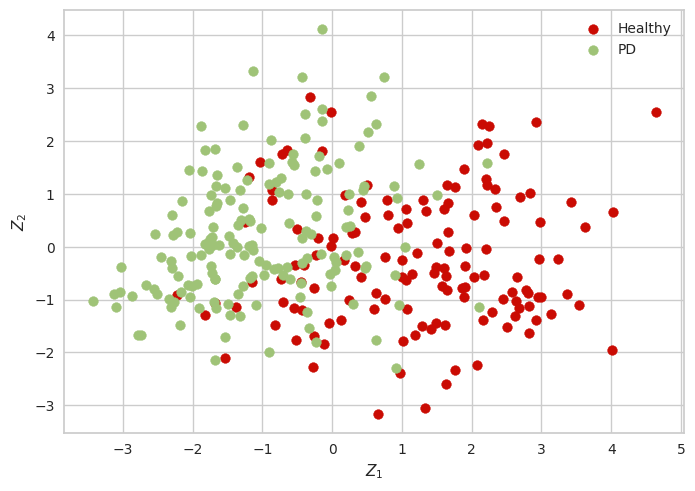

In [90]:
# Checking the scatter plot for healthy and sick people using the PCA model

pca = PCA()
Z = pca.fit_transform(X)

# 1(Healthy)->0,  2(PD)->1,
idx_Healthy = np.where(y == 0)
idx_PD = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Healthy,0], Z[idx_Healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_PD,0], Z[idx_PD,1], c='g', label='PD')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

### Eigen values and Eigen Vectors

*  Eigen originates in the German language and can be loosely
translated as “of itself”
*  Thus an eigenvalue of a matrix could be conceptualized as a “value of itself”
*  Vectors x having same direction as Ax are called eigenvectors of A (A is an n by n matrix).
*  In the equation Ax=λx, λ is called an eigenvalue of A.
*  Ax=λx ⇔ (A-λI)x=0
*  How to calculate x and λ:
*  Calculate det(A-λI), yields a polynomial (degree n)
*  Determine roots to det(A-λI)=0, roots are eigenvalues λ
*  Solve (A- λI) x=0 for each λ to obtain eigenvectors x

In [91]:
# Importing the library for generating the eigenvalues and eigenvectors

from numpy.linalg import eig

In [92]:
# Generating the covariance matrix and transpose it to get the eigenvalues and eigenvectors

cov_matrix = np.cov(X_std.T)

eigenvalues, eigenvectors = eig(cov_matrix)

In [93]:
eigenvalues

array([2.772176  , 1.54178039, 0.37309206, 0.42454351, 1.22688342,
       1.18505659, 0.53186008, 1.02535054, 0.97322784, 0.86562678,
       0.77851473, 0.72130605, 0.62362837])

In [94]:
eigenvectors

array([[ 0.31420252, -0.40614872, -0.18181083,  0.54823509, -0.09407661,
        -0.0206618 , -0.14054369,  0.30715312,  0.12829615,  0.22373018,
        -0.2624772 ,  0.37900026,  0.01672242],
       [ 0.09083783,  0.37779171, -0.06093808, -0.01101603,  0.55484915,
        -0.25530873, -0.28760018, -0.0507044 , -0.05496875,  0.16250682,
        -0.17599193,  0.1989252 , -0.53561904],
       [-0.27460749, -0.29726609, -0.00635061, -0.09720829,  0.35697431,
         0.28790041,  0.59428374, -0.16317945,  0.19341117,  0.21538959,
         0.04794993,  0.35143235, -0.16435134],
       [ 0.18392019, -0.43818675, -0.0201296 , -0.25872142,  0.2038493 ,
         0.02260103, -0.06413037, -0.18813809,  0.17945982, -0.33276335,
        -0.59533383, -0.35039179, -0.07152427],
       [ 0.11737503, -0.36451402,  0.00745311, -0.18379048, -0.40782498,
        -0.34340982, -0.10887361, -0.3200667 ,  0.10472957, -0.04932936,
         0.37238051,  0.1539752 , -0.49516986],
       [ 0.07363999, -0.317433

In [95]:
# Convert the array to a one-column matrix using reshape
eigenvalues_matrix = eigenvalues.reshape(-1, 1)

# Print the resulting matrix
print("λ = \n", eigenvalues_matrix)

# Displaying the eigenvectors array as a matrix
A = np.matrix(eigenvectors)
print("A =", A)

λ = 
 [[2.772176  ]
 [1.54178039]
 [0.37309206]
 [0.42454351]
 [1.22688342]
 [1.18505659]
 [0.53186008]
 [1.02535054]
 [0.97322784]
 [0.86562678]
 [0.77851473]
 [0.72130605]
 [0.62362837]]
A = [[ 0.31420252 -0.40614872 -0.18181083  0.54823509 -0.09407661 -0.0206618
  -0.14054369  0.30715312  0.12829615  0.22373018 -0.2624772   0.37900026
   0.01672242]
 [ 0.09083783  0.37779171 -0.06093808 -0.01101603  0.55484915 -0.25530873
  -0.28760018 -0.0507044  -0.05496875  0.16250682 -0.17599193  0.1989252
  -0.53561904]
 [-0.27460749 -0.29726609 -0.00635061 -0.09720829  0.35697431  0.28790041
   0.59428374 -0.16317945  0.19341117  0.21538959  0.04794993  0.35143235
  -0.16435134]
 [ 0.18392019 -0.43818675 -0.0201296  -0.25872142  0.2038493   0.02260103
  -0.06413037 -0.18813809  0.17945982 -0.33276335 -0.59533383 -0.35039179
  -0.07152427]
 [ 0.11737503 -0.36451402  0.00745311 -0.18379048 -0.40782498 -0.34340982
  -0.10887361 -0.3200667   0.10472957 -0.04932936  0.37238051  0.1539752
  -0.49516

In [96]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    0.624111  2.321270  2.474673  2.676239  0.375253  1.713567 -0.120352   
1   -0.455988 -0.957351  1.139595  2.426838  2.273767 -0.787861 -0.081513   
2   -1.828805  0.042885 -0.452229  0.406415  0.867802  0.767551 -0.104852   
3   -1.716006 -0.495337  0.030631 -0.112162 -0.235598 -0.502665 -0.142754   
4   -0.371356  0.301156 -2.841069 -0.809042  0.011389 -0.085495  1.415596   
..        ...       ...       ...       ...       ...       ...       ...   
298  1.146672 -0.519529 -1.708020  0.343846 -0.180372 -0.519780  1.550215   
299 -0.708593 -1.045752  0.544810  0.923661  0.899927 -1.220263 -0.695072   
300  2.459005  0.478262  2.208216  0.259376 -1.334690 -1.212580  0.543792   
301  1.762755 -2.336816  0.454753  0.536807 -1.182607 -0.359278  0.442427   
302 -0.860057  1.068516 -0.690074  0.230453  0.224116  0.596993 -0.744078   

          PC8       PC9      PC10      PC11      PC12  
0    0.736557 -0.638940  0.932651 -0.558115  0.404075  
1    1.535384  1.241824  1.165681 -0.492133  0.232260  
2   -0.063523  1.293202 -1.147066  0.363725  0.177977  
3   -0.177462 -0.152965  0.706572 -0.700291  1.073581  
4    0.607134 -0.186315  0.907423  0.414451  0.884467  
..        ...       ...       ...       ...       ...  
298 -0.721648 -0.599834 -1.143886  0.438045 -0.528301  
299  1.035087 -1.745170  0.290095  0.458588 -1.175043  
300  0.710111  0.252110 -0.910868 -1.463410  0.918447  
301 -1.181439 -0.352981 -0.966185  0.376824 -0.075541  
302  0.163770  0.801777 -1.058503  0.080240  0.313208  

[303 rows x 12 columns]

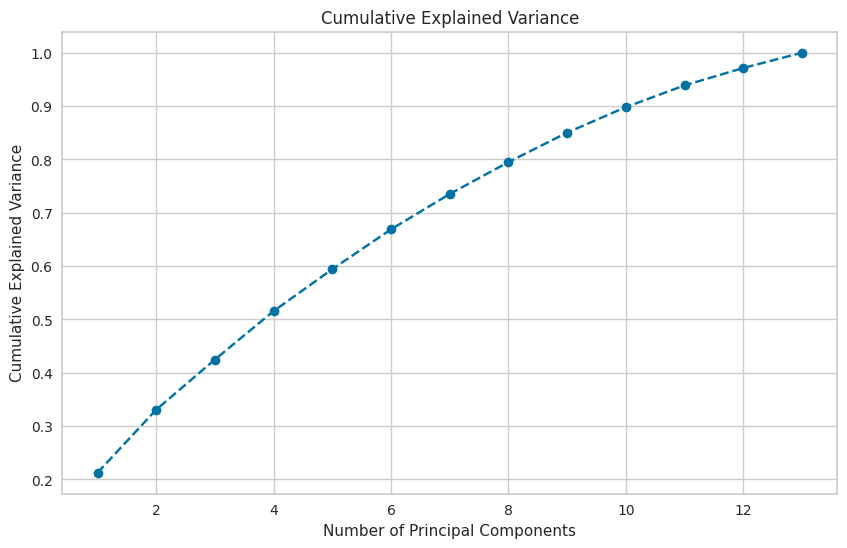

In [97]:
# Calculate the percentage of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [98]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5       PC6  \
age       0.314203  0.406149 -0.094077 -0.020662 -0.307153 -0.128296   
sex       0.090838 -0.377792  0.554849 -0.255309  0.050704  0.054969   
cp       -0.274607  0.297266  0.356974  0.287900  0.163179 -0.193411   
trtbps    0.183920  0.438187  0.203849  0.022601  0.188138 -0.179460   
chol      0.117375  0.364514 -0.407825 -0.343410  0.320067 -0.104730   
fbs       0.073640  0.317433  0.481736 -0.068605 -0.233442  0.249614   
restecg  -0.127728 -0.220882 -0.089191  0.266096 -0.393667 -0.666813   
thalachh -0.416498  0.077876  0.158255 -0.184125  0.323284 -0.120984   
exng      0.361267 -0.263118 -0.126356 -0.115056  0.034536  0.230699   
oldpeak   0.419639 -0.052255  0.110343  0.326296  0.250579 -0.170080   
slp      -0.379772  0.048374 -0.073818 -0.494849 -0.246823 -0.064069   
caa       0.273262  0.094147  0.183569 -0.328016 -0.435365 -0.182107   
thall     0.222024 -0.200720  0.125011 -0.389191  0.331950 -0.508857   

               PC7       PC8       PC9      PC10      PC11      PC12  
age      -0.223730 -0.262477 -0.379000 -0.016722 -0.140544  0.548235  
sex      -0.162507 -0.175992 -0.198925  0.535619 -0.287600 -0.011016  
cp       -0.215390  0.047950 -0.351432  0.164351  0.594284 -0.097208  
trtbps    0.332763 -0.595334  0.350392  0.071524 -0.064130 -0.258721  
chol      0.049329  0.372381 -0.153975  0.495170 -0.108874 -0.183790  
fbs       0.510818  0.432863 -0.177004 -0.153696 -0.142103  0.024730  
restecg   0.396896  0.099841 -0.038304  0.269966 -0.095545 -0.002694  
thalachh  0.101473  0.143461  0.372044  0.030813 -0.032507  0.608911  
exng      0.449919 -0.112607 -0.058500  0.198732  0.615901  0.239079  
oldpeak  -0.112888  0.192323  0.233603  0.111384 -0.015242  0.340833  
slp       0.055038 -0.261807 -0.028505  0.055934  0.168798  0.133566  
caa      -0.337606  0.259678  0.485808  0.035325  0.296739 -0.146030  
thall     0.055165  0.034349 -0.284201 -0.530831  0.043611 -0.072593

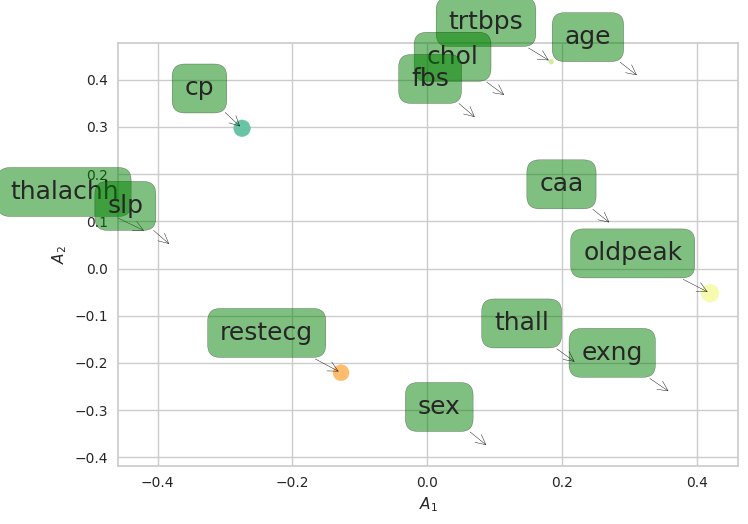

In [99]:
# Displaying the scatter plot using the PCA and labelling it
A = pca.components_.T
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))

plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### Scree Plot

Text(0, 0.5, 'Explained variance')

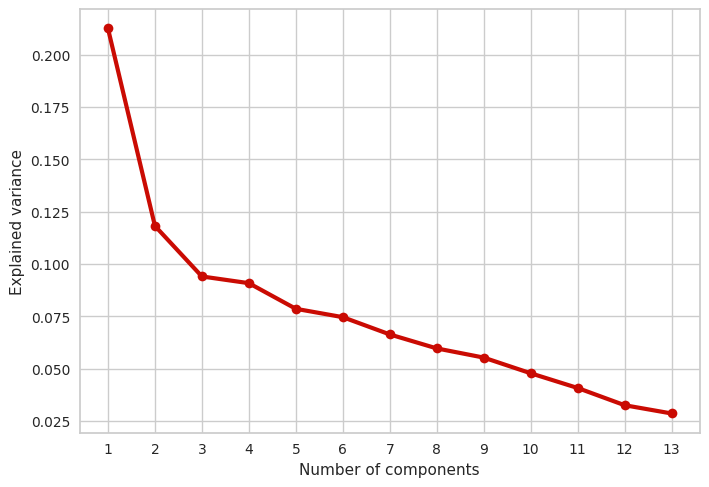

In [100]:
# Eigenvalues
Lambda = pca.explained_variance_

# Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

### Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

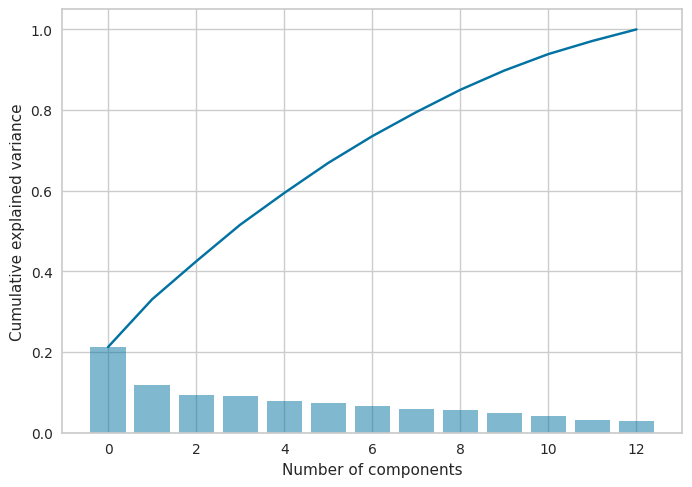

In [101]:
# Displaying the Pareto Chart for the explained variance

ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Biplot

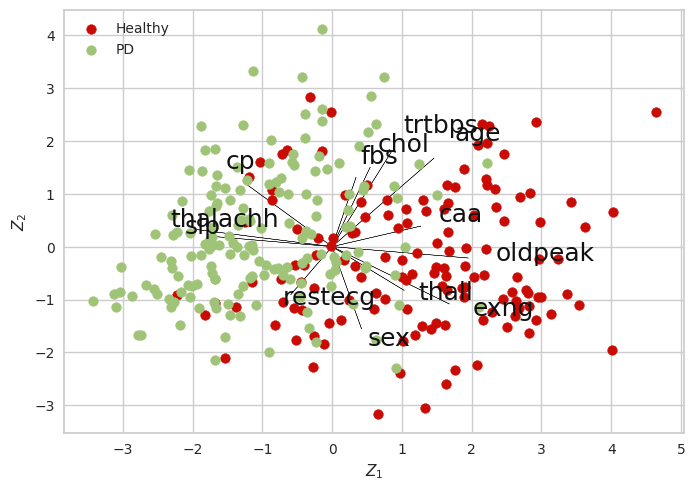

In [102]:
# Creating a biplot by assigning values for the vectors
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# Features are projected as vectors onto PC axes via arrows
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Healthy,0], Z[idx_Healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_PD,0], Z[idx_PD,1], c='g', label='PD')
plt.legend(loc='upper left')

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (21.2% expl.var)', ylabel='PC2 (11.8% expl.var)'>)

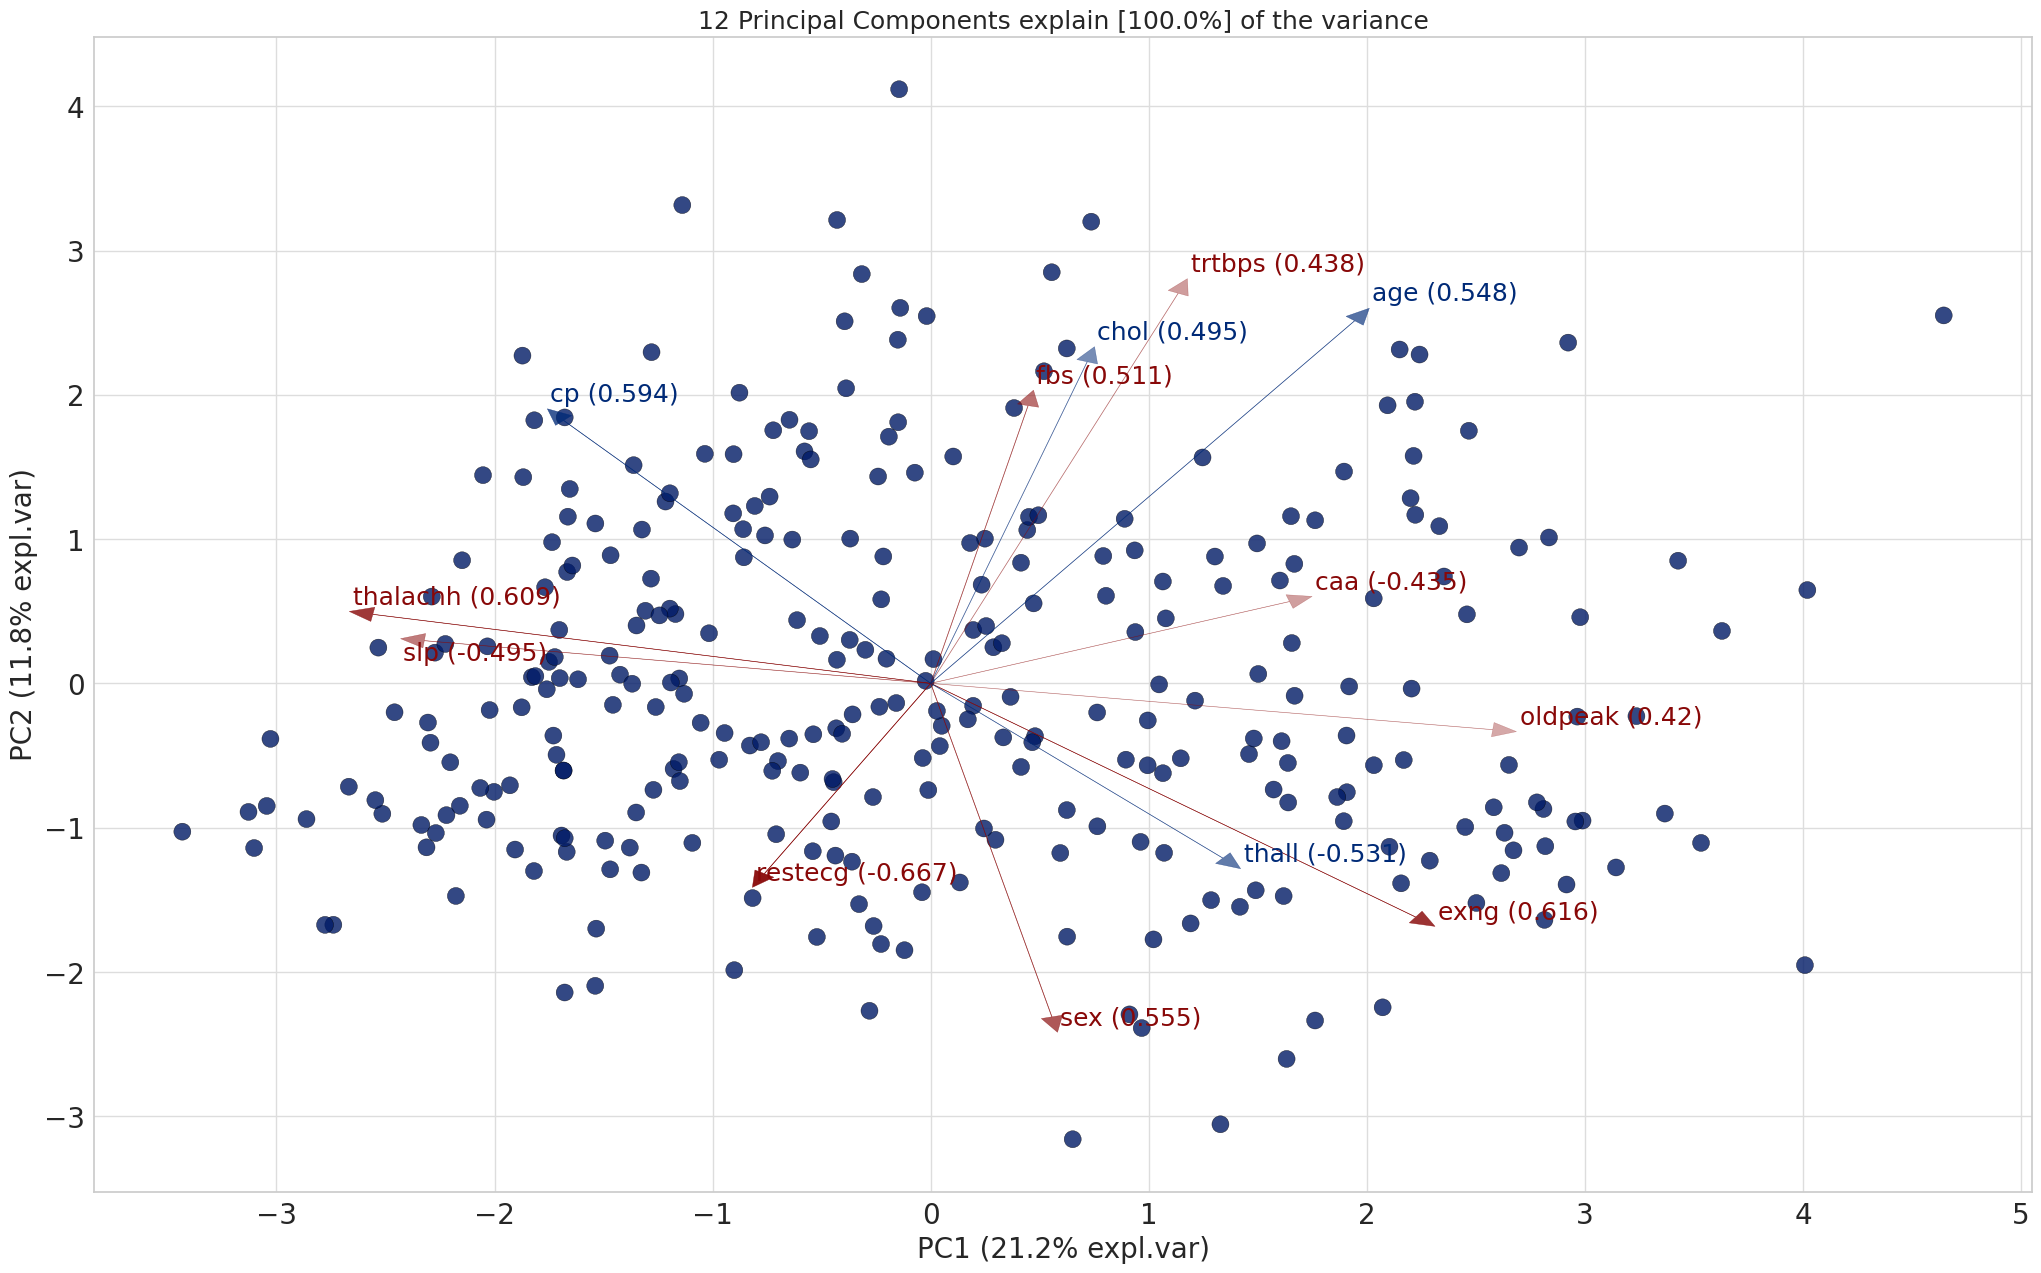

In [103]:
# 2D biplot

model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (21.2% expl.var)', ylabel='PC2 (11.8% expl.var)', zlabel='PC3 (9.40% expl.var)'>)

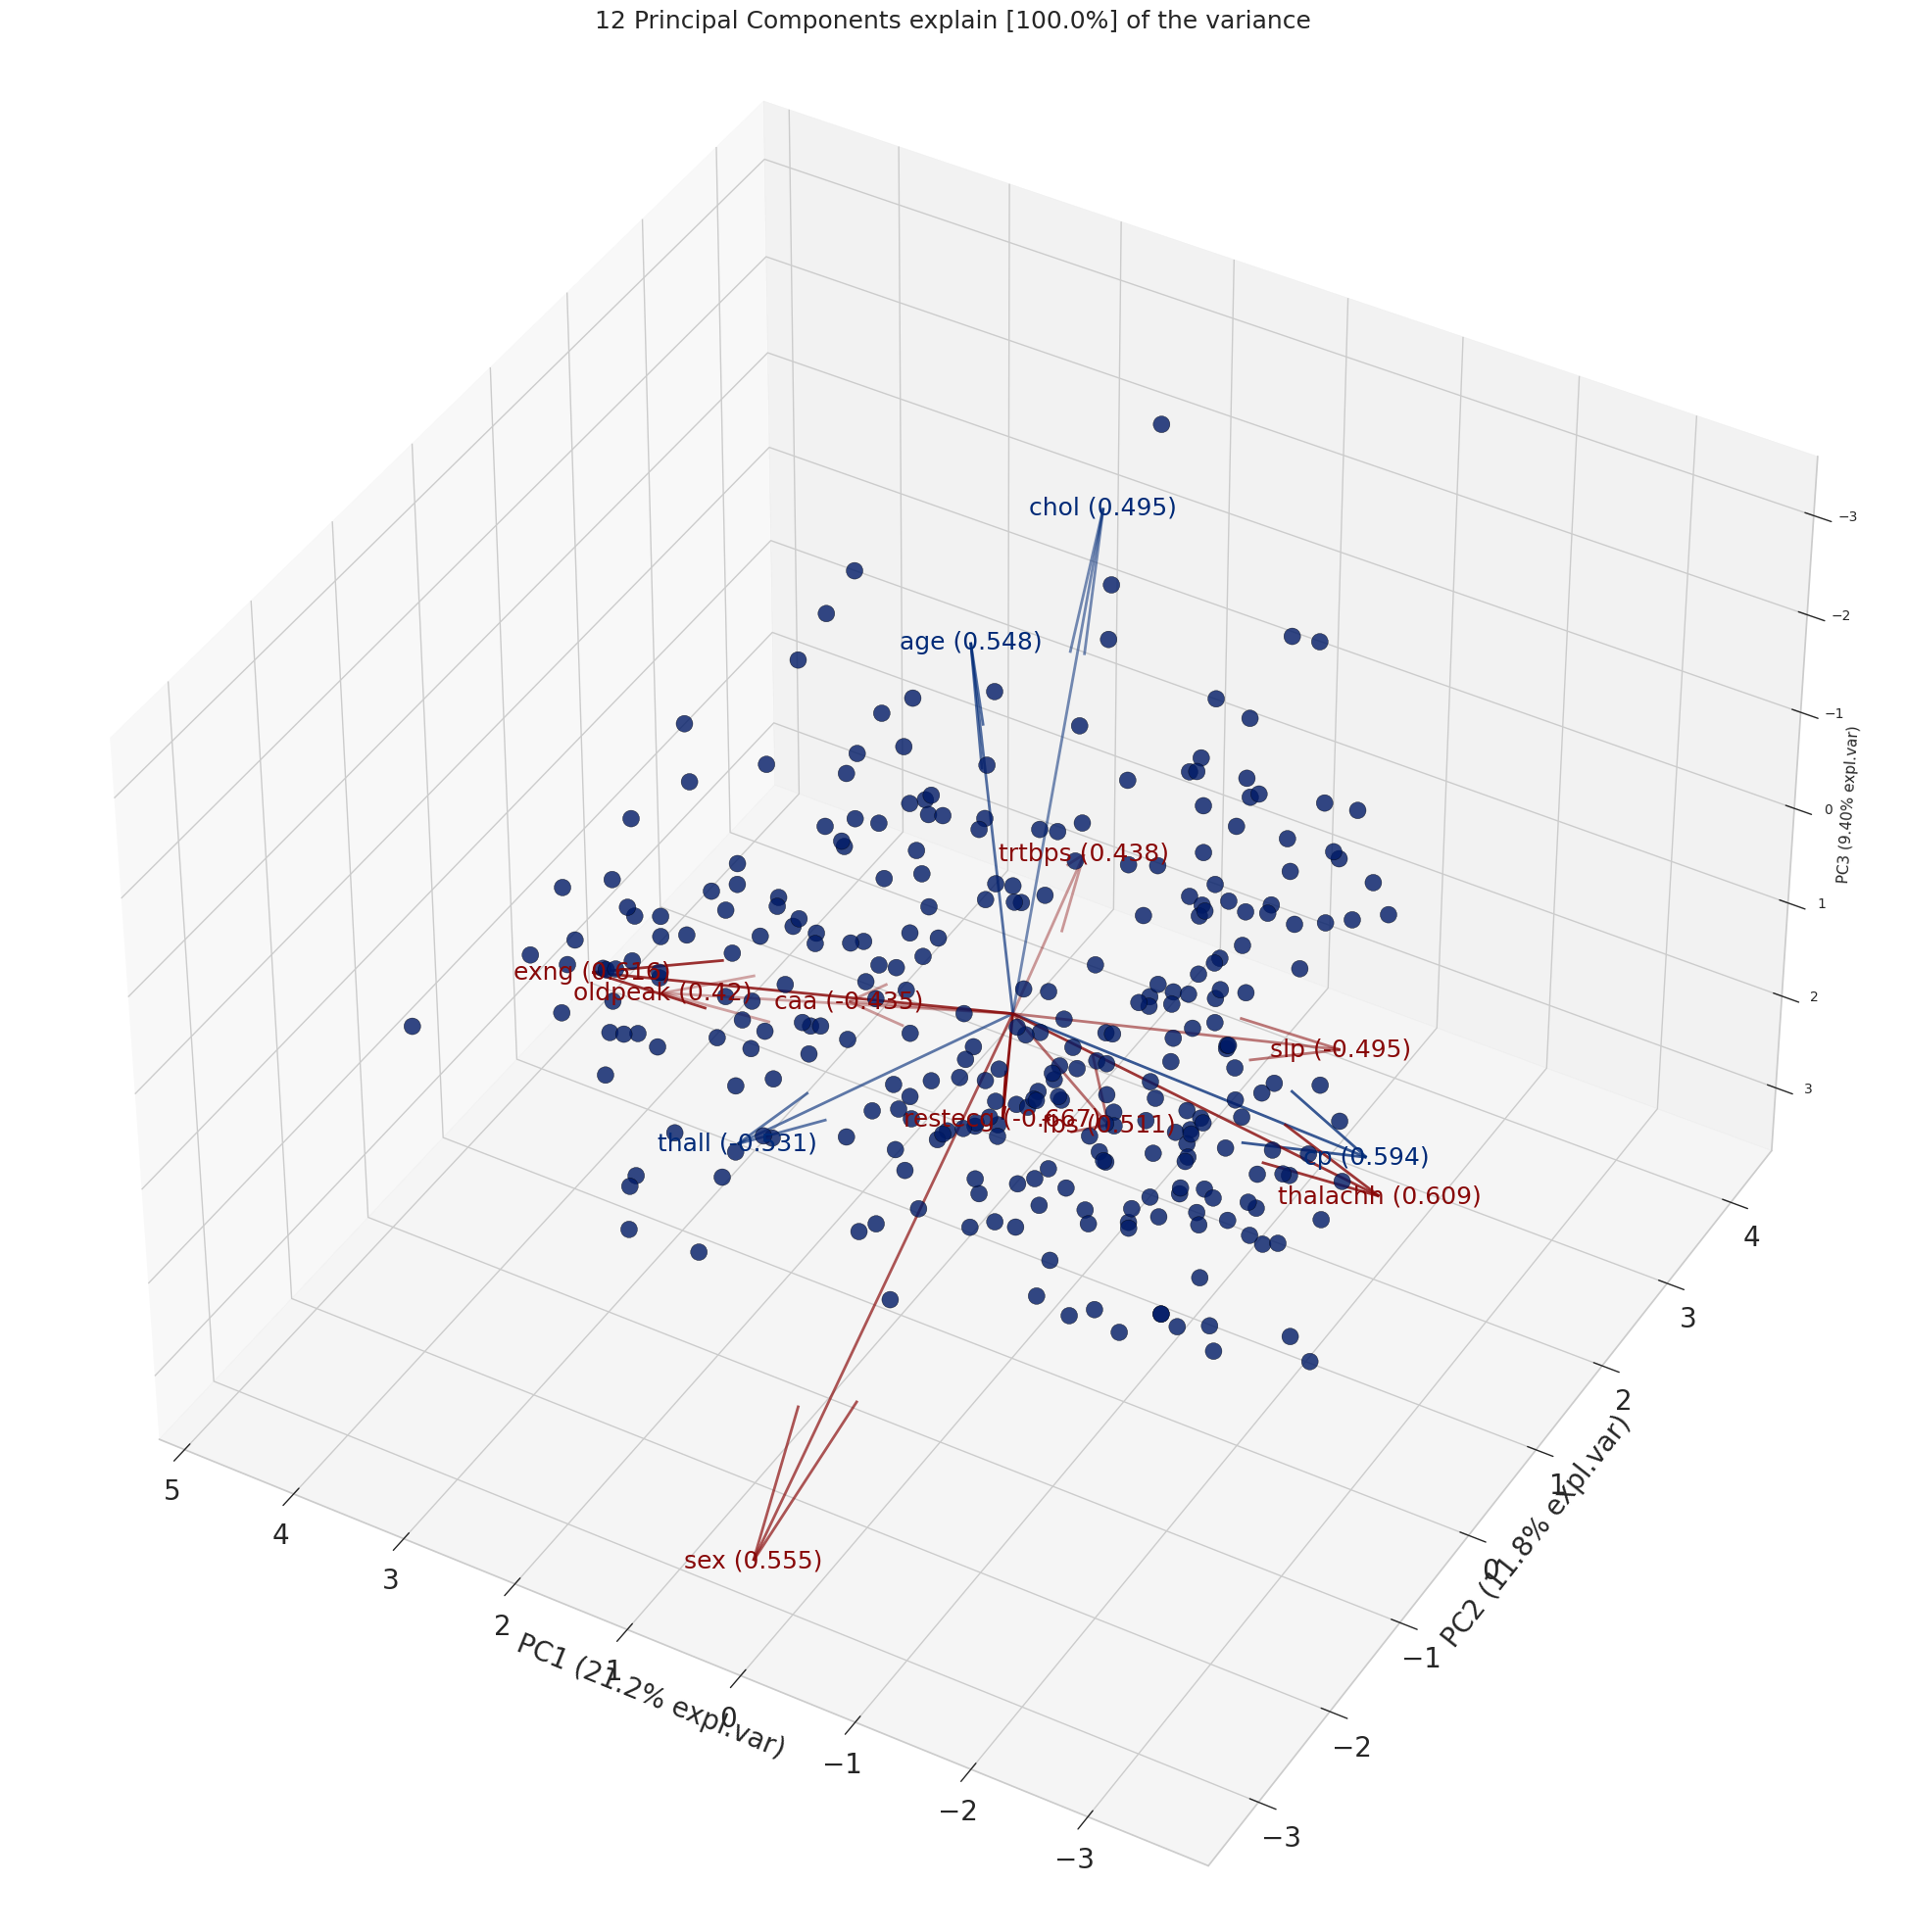

In [104]:
# 3D biplot

model.biplot3d(label = False, legend=False)

### Scatter Plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (21.2% expl.var)', ylabel='PC2 (11.8% expl.var)'>)

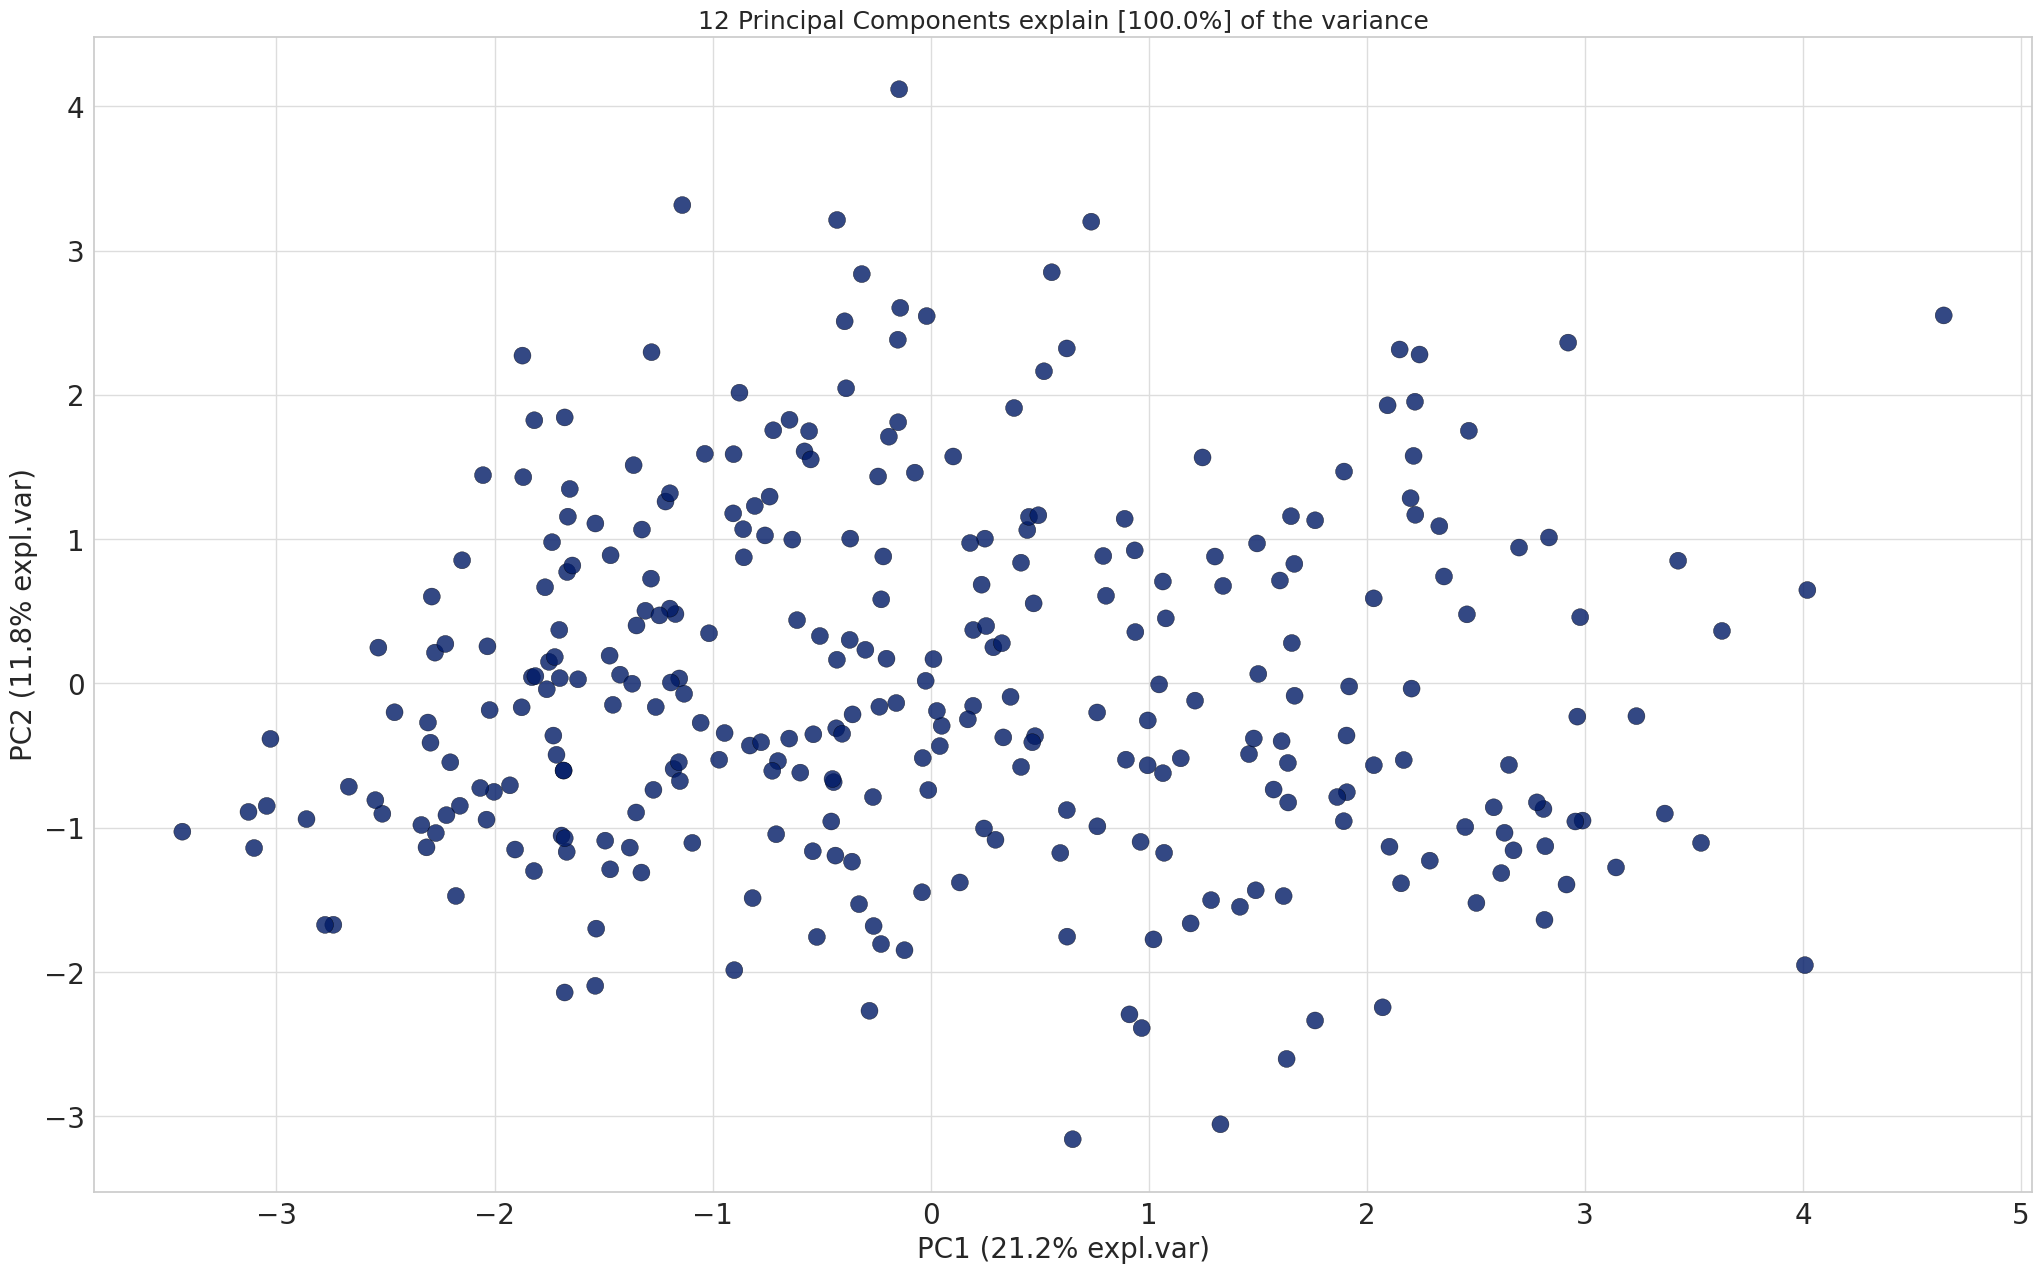

In [105]:
model.scatter(label=True, legend=False)

# 5. Train and Evaluate Model

### Classification Of PCA

In [106]:
# Creating a variable for the columns 'sex', 'cp', 'fbs', 'restecg', 'exng', 'thalachh'

features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'thalachh']

In [107]:
# Extracting the features for the dataset

experiment = setup(dfhd, target='output', categorical_features=features)

In [108]:
# Importing the libraries from pycaret and using it to split the data w.r.t to the dataset by classification of PCA

from pycaret.classification import *
clf_pca = setup(data=dfhd, target='output', train_size=0.7, session_id=747, normalize = True, pca = True, pca_components = 3)

### Comparision of best models

In [109]:
# Comparing and displaying the best models and their statistics
best_model = compare_models()


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [110]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=747, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Logistic Regression

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

In [111]:
# Creating the logistic regression model

lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [112]:
# Finetuning the logistic regression model

tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [113]:
# Checking the parameters used for the finetuning of the logistic regression model

tuned_lr

LogisticRegression(C=5.825, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=747, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
# Assessing the logistic regression model

evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Ridge Classifier

Ridge regression shrinks the coordinates with respect to the orthonormal basis formed by the principal components. Coordinates with respect to principal components with smaller variance are shrunk more. Instead of using X = (X1, X2, ... , Xp) as predicting variables, use the new input matrix ~X = UD.

In [115]:
ridge_pca = create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [116]:
tuned_ridge_pca = tune_model(ridge_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [117]:
evaluate_model(tuned_ridge_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Linear Discriminant Analysis

Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events.

In [118]:
lda_pca = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [119]:
tuned_lda_pca = tune_model(lda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [120]:
evaluate_model(tuned_lda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…